In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import math
import numpy.linalg

import scipy.stats as stat

#Bulk VAFS first

In [24]:
#Import data
variant_annotations_amps = pd.read_csv('../Data/VAF_Data/bulkVAF_data.tsv', sep = '\t', index_col = 0)

In [25]:
#Create empty values for PD7151 missing amplicon
cs = list(variant_annotations_amps.columns)
blank1 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.1',
 'PD7151_TET2a',
 'PD7151']
blank2 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.21',
 'PD7151_TET2b',
 'PD7151']
blank = pd.DataFrame(np.array([blank1, blank2]),columns=cs)

In [26]:
#Create a new df with the blank values and rearrange for plotting
var_ann_blank = pd.concat([variant_annotations_amps, blank])
var_ann_blank = var_ann_blank[['celltype', 'Mean_VAF', 'Amplicon', 'patient_init']]
var_ann_blank.sort_values(by=['Amplicon'], inplace = True)
var_ann_blank.sort_values(by=['celltype'], inplace = True)

In [27]:
#Rearrange again
patients = ['JP001', 'PD7153', 'PD7151']

all_amps = ['JP001_SRSF2',
            'PD7153_TET2b',
            'JP001_TET2a',
            'PD7153_TET2a', 
            'PD7151_TET2b',
            'JP001_TET2b_g', 
            'PD7153_SRSF2', 
            'JP001_RUNX1_g',
            'PD7153_CUX1',
            'PD7151_TET2a'
           ]
short_label = ['SRSF2',
        'TET2[b]',
        'TET2[a]',
        'TET2[a]', 
        'TET2[b]',
        'TET2[b]', 
        'SRSF2', 
        'RUNX1',
        'CUX1',
        'TET2[a]'
       ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

cell_order = ['BM', 'Mono', 'Neut', 'nBC']
cell_order_map = {x:i for i, x in enumerate(cell_order)}

var_ann_blank['x_value'] = var_ann_blank['celltype'].map(cell_order_map)

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.12
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.12

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.08
#var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.0
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.08

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.04

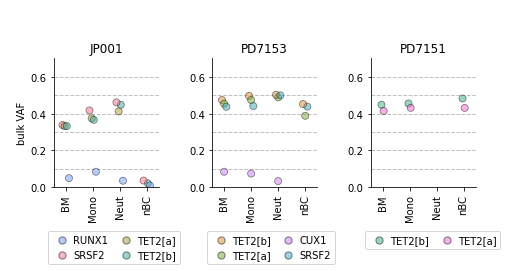

In [28]:
#Plot the VAFS
fig, (ax1,ax) = plt.subplots(2, 3, figsize = (7,4), gridspec_kw = dict(height_ratios = [1,4]), sharex = True)

#Adding dummy plot at top to match spacing exactly with scVAF plot
for count, patient in enumerate(patients):
    ax1[count].set_yscale('log')
    ax1[count].set_ylim(1, 1000)
    ax1[count].set_yticks([1, 10, 100, 1000])
    ax1labels = ['', 10, 100, 1000]
    ax1[count].set_yticklabels(ax1labels, color = 'white') 
    #ax1[count].set_title(f'{patient}') 
    ax1[count].spines['top'].set_visible(False)
    ax1[count].spines['right'].set_visible(False)
    ax1[count].spines['bottom'].set_visible(False)
    ax1[count].spines['left'].set_visible(False)
    ax1[count].tick_params(axis='x', colors='white')
    ax1[count].tick_params(axis='y', colors='white')    
    if count != 0:
        ax1[count].set_yticklabels([])
    else:
        ax1[count].set_ylabel('Cell #', color = 'white')

for count, patient in enumerate(patients):
    plot_data = var_ann_blank.loc[var_ann_blank['patient_init'].isin([patient])]
    
                
    sns.scatterplot(x = 'x_value', y = 'Mean_VAF', data = plot_data,  s = 50, hue = 'Amplicon', palette = allVAFcols, alpha = 0.5, edgecolor = 'black', ax = ax[count])
    handles, labels = ax[count].get_legend_handles_labels()
    lbl = []
    for lb in labels[1:]:
        lbl.append(relabel[lb])    
    
    lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:], labels=lbl)
    #ax[count].set_title(f'{patient}') 
    ax[count].set_ylim(0,0.7)
    ax[count].axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    ax[count].margins(x=0.1)
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    ax[count].set_title(f'{patient}')

    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    
    if count == 0:
        ax[count].set_ylabel('bulk VAF')
    
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        lh.set_edgecolor('black')

plt.rcParams['svg.fonttype'] = 'none'  
fig.tight_layout(h_pad = 0, w_pad = 2)     
fig.savefig('../Results/Bulk_VAFs.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/Bulk_VAFs.png',bbox_inches='tight', dpi = 600)

#Now the scVAFs

In [260]:
#Functions
def data_retrieval(sourcefile, metadata, pt_id):

	'''
	This function reads data for a single patient from a master spreadsheet with amplicon data for all plates/patients.
	Input is the sourcefile with the readcounts (allele_counts_anon), and a metadata file which contains cell type for each plate (Amplicon_metadata_fixed_anon.xlsx).
	The function returns a dataframe containing just the data for the specified patient, ready to merge with index data and then plot.
	'''

	df = pd.read_csv(sourcefile, header = [0,1,2], index_col = 0, sep='\t')
	df = df.stack([0,1,2])
	df = df.reorder_levels([1,0,2,3])
	df = df.to_frame()  #puts everything back in a dataframe
	df.columns = ['Reads']
	df['Plate'] = df.index.get_level_values(0)  #These lines send indexes to columns
	df['Well'] = df.index.get_level_values(1)
	df['Amplicon'] = df.index.get_level_values(2)
	df['Genotype'] = df.index.get_level_values(3)
	df[['Patient', 'one', 'two']] = df['Amplicon'].str.split('_', expand = True)
	df = df.drop(columns = ['one', 'two'])

	#Import information about plate cell type and patient
	key = pd.read_excel(metadata, sheet_name = 'PlateID') #should this be an input? also in next fucntion
	key = key.drop(['Cell Origin', 'Plate Nr', 'Plate Name','Nr of cells'], axis=1)
	key.rename(columns = {'Comments2':'Plate'}, inplace = True)
	key.rename(columns = {'Cell-group':'Celltype'}, inplace = True)

	#Make a dictionary to associate plates with patients and plate with cell type
	plate_pt_dict = dict(zip(key.Plate, key.Patient))
	plate_cell_dict = dict(zip(key.Plate, key.Celltype))

	#Now just look at data from selected patient, and apply filters to identify cells with enough reads/amplicon
	pt_allele_plate = df.loc[df['Patient'].isin([pt_id])] 
	pt_allele_plate = pt_allele_plate.drop(columns = 'Patient') #Drop the Patient ID column and other unwanted cols
	pt_allele_plate['Cell_type'] = pt_allele_plate['Plate'].replace(plate_cell_dict)
	pt_allele_plate['Plate_Well'] = pt_allele_plate['Plate'].astype(str) + '_' + pt_allele_plate['Well'].astype(str)

	return pt_allele_plate

def calc_scVAF_mod(data, pt_init, reads, draw_plot = False):
    
    '''
    This function takes amplicon read counts for mt and wt and calculates the proportion of mutated alleles in each cell 
    that meets the specified read count for that amplicon.
    
    '''
    
    cond = pt_init
    print(cond)
    
    #Order of cols has to mach the df, do not reorder
    if cond == 'JP001':  #cols is the columns actually being used, can be easily tweaked
        cols = ['JP001_RUNX1_g','JP001_SRSF2','JP001_TET2a','JP001_TET2b_g']
        allcols = ['JP001_RUNX1_c','JP001_RUNX1_g','JP001_SRSF2','JP001_TET2a','JP001_TET2b_c','JP001_TET2b_g']
        cols_order = ['JP001_SRSF2','JP001_TET2a','JP001_TET2b_g', 'JP001_RUNX1_g']
    elif cond == 'PD7153':
        cols = ['PD7153_SRSF2', 'PD7153_TET2a', 'PD7153_TET2b']
        allcols = ['PD7153_CUX1', 'PD7153_SRSF2', 'PD7153_TET2a', 'PD7153_TET2b', 'PD7153_TGFB3_c', 'PD7153_TGFB3_g']
        cols_order = ['PD7153_TET2b','PD7153_SRSF2', 'PD7153_TET2a' ]
    elif cond == 'PD7151': 
        cols = ['PD7151_TET2a', 'PD7151_TET2b']
        allcols = ['PD7151_TET2a', 'PD7151_TET2b']
        cols_order = ['PD7151_TET2b', 'PD7151_TET2a']
        
    else:
        print('Enter JP001,  PD7153, or PD7151 as pt_id')
    
    #Import information about plate cell type and patient
    key = pd.read_excel('../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx', sheet_name = 'PlateID')
    key = key.drop(['Cell Origin', 'Plate Nr', 'Plate Name','Nr of cells'], axis=1)
    key.rename(columns = {'Comments2':'Plate'}, inplace = True)
    key.rename(columns = {'Cell-group':'Celltype'}, inplace = True)
    
    #Make a dictionary to associate plates with patients and plate with cell type
    plate_pt_dict = dict(zip(key.Plate, key.Patient))
    plate_cell_dict = dict(zip(key.Plate, key.Celltype))
    
    #Group the data and apply filters
    df = data.copy()
    qc = data.copy()
    #qc = qc.groupby(['Plate', 'Well', 'Genotype' ,'Amplicon']).sum().unstack()
    qc = qc.groupby(['Plate', 'Well','Amplicon', 'Genotype']).sum().unstack()
    df = df.groupby(['Plate', 'Well', 'Amplicon']).sum().unstack()
    df.columns = allcols
    df['Plate'] = df.index.get_level_values(0)  #These lines send indexes to columns
    df['Well'] = df.index.get_level_values(1)
    df['Plate_Well'] = df['Plate'].astype(str) + '_' + df['Well'].astype(str)
    df['Sort_cell_type'] = df['Plate'].replace(plate_cell_dict)
    rename = {'CD34+halfCD38-': 'CD34', 'CD34+/38-':'CD34', 'CD34+':'CD34', 'NEs':'Neut', 'Monocytes': 'Mono', 'nBCs': 'nBC'}
    df['Sort_cell_type'].replace(rename, inplace = True)#df now contains cell type as well
    
    #Modify here to sequentially get subframes
    
    result = {}
    sem_result = {}
    numcell = {}
    
    for c in cols:
        
        #Work out which wells fit the read criteria, and how many cells there are of each type
        df1 = df.loc[(df[c] >= reads)] #df1 contains just the rows with cells we want - use this to create a filter or key
        wells = df1['Plate_Well'].drop_duplicates().to_list()  #cells that meet the criteria
        print(f'Cells with {reads} reads for amplicon {c}  = ', len(wells))
        
        dfcells = df1['Sort_cell_type'].drop_duplicates().to_list()
        
        for dfc in dfcells:
            cellno = df1.loc[df1['Sort_cell_type'].isin([dfc])].shape[0]
            print(dfc, cellno)
            sample_id = c + ',' + dfc
            numcell[sample_id] = [cellno] #cellno dictionary now contains counts
        
        cell_counts = pd.DataFrame.from_dict(numcell, orient = 'Index', columns = ['cell_count'])
        #cell_counts gets created in each iteration from numcell, but numcell gets the counts added in each iteration
        #so the final iteration cell_counts has all the counts. This is what is used in the final output
        cell_counts['labels'] = cell_counts.index.get_level_values(0)
        cell_counts[['Amplicon', 'sort_celltype']] = cell_counts['labels'].str.split(',', expand = True)
        cell_counts = cell_counts.drop(columns = 'labels')
        
        df2 = data.copy()
        df2 = df2[df2['Plate_Well'].isin(wells)]
        df2 = df2[df2['Amplicon'].isin(cols)]
        

        #Calculate the allele frequency
        df2 = df2.iloc[:, 0:1].unstack(level = 3)
        df2['Total'] = df2.iloc[: , 0] + df2.iloc[: , 1]
        df2['Mut_freq'] = df2.iloc[:, 0]/df2['Total']

        df2 = df2.drop(columns = ['Reads', 'Total'])
        df2 = df2.unstack(2)
        df2.columns = cols
        df2['Sort_cell_type'] = df2.index.get_level_values(0)
        df2['Sort_cell_type'] = df2['Sort_cell_type'].replace(plate_cell_dict)
        #df2['Plate'] = df2.index.get_level_values(0)
        #df2['Well'] = df2.index.get_level_values(1)
        #df2['Plate_Well'] = df2['Plate'].astype(str) + '_' + df2['Well'].astype(str)
        #df2 = df2.drop(columns = ['Plate', 'Well'])
        
        df2['Sort_cell_type'].replace(rename, inplace = True)
        df2.sort_values(by=['Sort_cell_type'], inplace = True)
  
        #Get means for each amplicon/cell type
        x = df2.copy().groupby(by = 'Sort_cell_type').mean()
        x = x.unstack().to_frame()
        x['celltype'] = x.index.get_level_values(1)
        x['Amplicon'] = x.index.get_level_values(0)
        co = ['VAF', 'sort_celltype', 'Amplicon']
        x.columns = co   
        
        
        #Get sem for each amplicon/cell type
        x2 = df2.copy().groupby(by = 'Sort_cell_type').sem()        
        x2 = x2.unstack().to_frame()
        x2['celltype'] = x2.index.get_level_values(1)
        x2['Amplicon'] = x2.index.get_level_values(0)
        co2 = ['sem', 'sort_celltype', 'Amplicon']
        x2.columns = co2  
        
        result[c] = x.loc[x['Amplicon'].isin([c])]
        sem_result[c] = x2.loc[x2['Amplicon'].isin([c])]

    x_result = pd.concat(result.values(), axis = 0)
    x2_result = pd.concat(sem_result.values(), axis = 0)
    x_x2 = x_result.merge(x2_result, how = 'left', on = ['Amplicon', 'sort_celltype'] )
    
    final = x_x2.merge(cell_counts, how = 'left', on = ['Amplicon', 'sort_celltype'])

    
    order = {}
    for a, d in enumerate(cols_order):
        order[d] = a
    print(order)
    
    x_result['order'] =  x_result['Amplicon'].replace(order)
    x_result.sort_values(by=['order'], inplace = True)
    
    all_amps = ['JP001_SRSF2',
        'PD7153_TET2b',
        'JP001_TET2a',
        'PD7153_TET2a', 
        'PD7151_TET2b',
        'JP001_TET2b_g', 
        'PD7153_SRSF2', 
        'JP001_RUNX1_g',
        'PD7153_CUX1',
        'PD7151_TET2a'
       ]
    colors = sns.color_palette('husl', n_colors = len(all_amps))
    allVAFcols = dict(zip(all_amps, colors))

    #This plots the mean only
    if draw_plot == True:
        fig, ax = plt.subplots(figsize = (2.5,4))
        sns.scatterplot(x = 'sort_celltype', y = 'VAF', data = x_result, s = 80,  hue = 'Amplicon', palette = allVAFcols, alpha = 0.5, ax = ax)
        ax.legend(loc = 'upper left', bbox_to_anchor = [1,1], title = 'scVAFs')
        ax.set_ylim(0,0.6)
        ax.axhline(0.1, ls = '--', c = 'silver', zorder = 0)
        ax.axhline(0.2, ls = '--', c = 'silver', zorder = 0)
        ax.axhline(0.3, ls = '--', c = 'silver', zorder = 0)
        ax.axhline(0.4, ls = '--', c = 'silver', zorder = 0)
        ax.axhline(0.5, ls = '--', c = 'silver', zorder = 0)
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.tick_params(axis='x', labelrotation = 90)
        ax.margins(x=0.1)
        
    return final

In [262]:
sourcefile = '../Data/Amp_data/allele_counts_anon.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'PD7151'
plate = data_retrieval(sourcefile, metadata, pt_id)
reads = 10
plate1_PD7151 = calc_scVAF_mod(plate, pt_id, reads)

PD7151
Cells with 10 reads for amplicon PD7151_TET2a  =  1230
Mono 508
Neut 175
CD34 324
nBC 223
Cells with 10 reads for amplicon PD7151_TET2b  =  3156
Mono 710
Neut 709
CD34 1033
nBC 704
{'PD7151_TET2b': 0, 'PD7151_TET2a': 1}


In [263]:
pt_id = 'PD7153'
plate = data_retrieval(sourcefile, metadata, pt_id)
reads = 10
plate1_PD7153 = calc_scVAF_mod(plate, pt_id, reads)

PD7153
Cells with 10 reads for amplicon PD7153_SRSF2  =  1325
Mono 322
Neut 165
nBC 21
CD34 817
Cells with 10 reads for amplicon PD7153_TET2a  =  2158
Mono 548
Neut 614
nBC 59
CD34 937
Cells with 10 reads for amplicon PD7153_TET2b  =  1957
Mono 555
Neut 468
nBC 22
CD34 912
{'PD7153_TET2b': 0, 'PD7153_SRSF2': 1, 'PD7153_TET2a': 2}


In [264]:
pt_id = 'JP001'
plate = data_retrieval(sourcefile, metadata, pt_id)
reads = 10
plate1_JP001 = calc_scVAF_mod(plate, pt_id, reads)

JP001
Cells with 10 reads for amplicon JP001_RUNX1_g  =  2948
Mono 643
Neut 633
nBC 698
CD34 974
Cells with 10 reads for amplicon JP001_SRSF2  =  2618
Mono 643
Neut 260
nBC 737
CD34 978
Cells with 10 reads for amplicon JP001_TET2a  =  2872
Mono 634
Neut 647
nBC 692
CD34 899
Cells with 10 reads for amplicon JP001_TET2b_g  =  332
Mono 55
Neut 207
nBC 52
CD34 18
{'JP001_SRSF2': 0, 'JP001_TET2a': 1, 'JP001_TET2b_g': 2, 'JP001_RUNX1_g': 3}


In [266]:
#Combine data from all patients
frames = [plate1_JP001, plate1_PD7153, plate1_PD7151]
plate1_all = pd.concat(frames)

pt_test = []
for index, row in plate1_all.iterrows():
    pt_test.append(row['Amplicon'].split('_')[0])

plate1_all['Pt'] = pt_test

In [267]:
#Rearrange and include cell numbers
pts = ['JP001', 'PD7153', 'PD7151']

all_amps = ['JP001_SRSF2',
            'PD7153_TET2b',
            'JP001_TET2a',
            'PD7153_TET2a', 
            'PD7151_TET2b',
            'JP001_TET2b_g', 
            'PD7153_SRSF2', 
            'JP001_RUNX1_g',
            'PD7153_CUX1',
            'PD7151_TET2a'
           ]
short_label = ['SRSF2',
        'TET2[b]',
        'TET2[a]',
        'TET2[a]', 
        'TET2[b]',
        'TET2[b]', 
        'SRSF2', 
        'RUNX1',
        'CUX1',
        'TET2[a]'
       ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

#Convert categoricals to numbers on x axis
cell_order = ['CD34', 'Mono', 'Neut', 'nBC']
cell_order_map = {x:i for i, x in enumerate(cell_order)}

plate1_all['x_value'] = plate1_all['sort_celltype'].map(cell_order_map)

#Nudge all the points by tweaking x value
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.12
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.12

plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.08
#plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.0
plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.08

plate1_all.loc[plate1_all['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.04

In [268]:
plate1_all

,VAF,sort_celltype,Amplicon,sem,cell_count,Pt,x_value
0,0.051698,CD34,JP001_RUNX1_g,0.003604,974,JP001,0.12
1,0.110172,Mono,JP001_RUNX1_g,0.007166,643,JP001,1.12
2,0.064032,Neut,JP001_RUNX1_g,0.005506,633,JP001,2.12
3,0.012128,nBC,JP001_RUNX1_g,0.002026,698,JP001,3.12
4,0.484417,CD34,JP001_SRSF2,0.006174,978,JP001,-0.12
5,0.484434,Mono,JP001_SRSF2,0.010535,643,JP001,0.88
6,0.449934,Neut,JP001_SRSF2,0.020915,260,JP001,1.88
7,0.032311,nBC,JP001_SRSF2,0.002544,737,JP001,2.88
8,0.361941,CD34,JP001_TET2a,0.008593,899,JP001,-0.04
9,0.306718,Mono,JP001_TET2a,0.009964,634,JP001,0.96


In [269]:
bd_df = plate1_all.copy()
#Nudge all the points a bit further for bar plots
bd_df.loc[bd_df['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.15
bd_df.loc[bd_df['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.05
bd_df.loc[bd_df['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.05
bd_df.loc[bd_df['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.15

bd_df.loc[bd_df['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.1
#bd_df.loc[bd_df['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.0
bd_df.loc[bd_df['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.1

bd_df.loc[bd_df['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.05
bd_df.loc[bd_df['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.05

bar_data = bd_df.groupby(['Pt', 'sort_celltype', 'Amplicon']).mean()
bar_data['Pt'] = bar_data.index.get_level_values(0)
bar_data['Amplicon'] = bar_data.index.get_level_values(2)

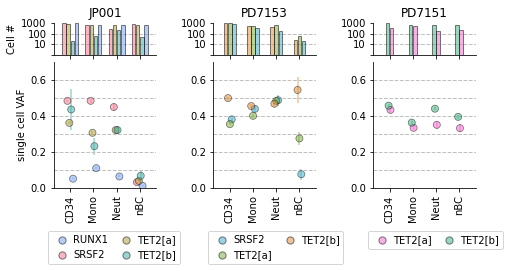

In [277]:
#plot the data
fig, (ax1,ax2) = plt.subplots(2, 3, figsize = (7,4), gridspec_kw = dict(height_ratios = [1,4]), sharex = True) 

ax = ax1
for count, pt in enumerate(pts):
    data = bar_data.loc[bar_data['Pt'].isin([pt])]
    
    for i, row in data.iterrows():
        x = row['x_value']
        y = row['cell_count']
        color = allVAFcols[row['Amplicon']]
        
        ax[count].bar([x], [y], width = 0.15, color = color, alpha = 0.5,  edgecolor = 'black')
    
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    ax[count].set_yscale('log')
    ax[count].set_ylim(1, 1000)
    ax[count].set_yticks([1, 10, 100, 1000])
    ax1labels = ['', 10, 100, 1000]
    ax[count].set_yticklabels(ax1labels)
    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    if count == 0:
        ax[count].set_ylabel('Cell #')
    
    ax[count].axhline(10, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(100, ls = '--', c = 'silver', lw = 1, zorder = 0)

ax = ax2

for count, pt in enumerate(pts):
    
    data = plate1_all.loc[plate1_all['Pt'].isin([pt])]
    
    sns.scatterplot(x = 'x_value', y = 'VAF', data = data, s = 50, hue = 'Amplicon', palette = allVAFcols,  edgecolor = 'black', alpha = 0.5, ax = ax[count])
    handles, labels = ax[count].get_legend_handles_labels() 
    
    #Plot sem bars
    for i, row in data.iterrows():
        x = row['x_value']
        y = row['VAF']
        e = row['sem']
        color = allVAFcols[row['Amplicon']]
        
        ax[count].errorbar(x, y, yerr=e, fmt='.', color = color, ms = 0, alpha = 0.5, zorder = 0)
    
    #rename labels for amplicons
    lbl = [] 
    for lb in labels:
        if lb not in all_amps:
            lbl.append(lb)
        else:
            lbl.append(relabel[lb])
                
    
    if pt == 'JP001':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:5], labels=lbl[1:5])
    elif pt == 'PD7153':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:4], labels=lbl[1:4])
    elif pt == 'PD7151':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:3], labels=lbl[1:3])
    
    ax[count].set_ylim(0,0.7)
    ax[count].axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    ax1[count].set_title(f'{pt}')
    ax[count].margins(x=0.1)
    
    if count == 0:
        ax[count].set_ylabel('single cell VAF')

        
    
    #Manually adjust ticks and labels since now plotting at arbitrary x values
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    
    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        lh.set_edgecolor('black')
        
plt.rcParams['svg.fonttype'] = 'none'    
fig.tight_layout(h_pad = 0, w_pad = 2)  
fig.savefig('../Results/sc_VAFs_cell_no.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/sc_VAFs_cell_no.png',bbox_inches='tight', dpi = 600)

#Now plot sc vs bulk

In [62]:
#bulk data
bulk_data = variant_annotations_amps.copy()
bulk_data = bulk_data[['celltype', 'Mean_VAF', 'Amplicon', 'patient_init']]
bulk_data.columns = ['ct', 'b_VAF', 'amplicon', 'pt']
bulk_data['b_ct'] = bulk_data['ct']
bulk_data.shape[0]

36

In [287]:
#sc data
sc_data = plate1_all.copy()
sc_data.columns = ['s_VAF', 'ct', 'amplicon', 's_sem', 's_count', 'pt', 'offset']
sc_data['s_ct'] = sc_data['ct'] #retain old designation for QC
#Rename CD34 to BM for merging
s_rename = {'CD34':'BM'}
sc_data['ct'].replace(s_rename, inplace = True)
sc_data.shape[0]
#sc_data

36

In [288]:
#Merge data
all_VAF = sc_data.merge(bulk_data, on = ['pt', 'ct', 'amplicon'])
all_VAF

,s_VAF,ct,amplicon,s_sem,s_count,pt,offset,s_ct,b_VAF,b_ct
0,0.051698,BM,JP001_RUNX1_g,0.003604,974,JP001,0.12,CD34,0.049,BM
1,0.110172,Mono,JP001_RUNX1_g,0.007166,643,JP001,1.12,Mono,0.084,Mono
2,0.064032,Neut,JP001_RUNX1_g,0.005506,633,JP001,2.12,Neut,0.035,Neut
3,0.012128,nBC,JP001_RUNX1_g,0.002026,698,JP001,3.12,nBC,0.009,nBC
4,0.484417,BM,JP001_SRSF2,0.006174,978,JP001,-0.12,CD34,0.338,BM
5,0.484434,Mono,JP001_SRSF2,0.010535,643,JP001,0.88,Mono,0.417,Mono
6,0.449934,Neut,JP001_SRSF2,0.020915,260,JP001,1.88,Neut,0.461,Neut
7,0.032311,nBC,JP001_SRSF2,0.002544,737,JP001,2.88,nBC,0.036,nBC
8,0.361941,BM,JP001_TET2a,0.008593,899,JP001,-0.04,CD34,0.332,BM
9,0.306718,Mono,JP001_TET2a,0.009964,634,JP001,0.96,Mono,0.374,Mono


JP001 (0.9024018590637137, 4.184677552895131e-06)
PD7153 (0.5721370202515634, 0.05191245444355426)
PD7151 (0.05057438580517759, 0.9242031000776822)


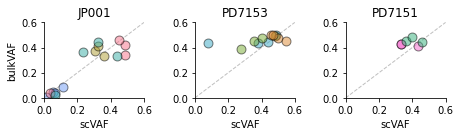

In [289]:
pts = ['JP001', 'PD7153', 'PD7151']

fig, ax = plt.subplots(1, 3, figsize = (6.5,2))

for count, pt in enumerate(pts):
    
    data = all_VAF.loc[all_VAF['pt'].isin([pt])]
    print(pt, stat.pearsonr(data['s_VAF'], data['b_VAF']))

    x_list = []
    y_list = []

    for i, row in data.iterrows():
        x = row['s_VAF']
        x_list.append(x)
        y = row['b_VAF']
        y_list.append(y)
        color = allVAFcols[row['amplicon']]
        ax[count].scatter(x, y, color = color, alpha = 0.5, s = 80, edgecolor = 'black')

    #m, b = np.polyfit(x_list, y_list, 1)
    x = np.array([0, 0.2, 0.4, 0.6])
    ax[count].plot(x, x, ls = '--', c = 'silver', lw = 1, zorder = 0)
    
    ax[count].set_ylim(0,0.6)
    ax[count].set_xlim(0,0.6)
    ax[count].margins(x=0.1)
    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    ax[count].set_xlabel('scVAF')
    ax[count].set_title(f'{pt}')
    
    if pt == 'JP001':
        ax[count].set_ylabel('bulkVAF')

    
fig.tight_layout(h_pad = 0, w_pad = 2)     
fig.savefig('../Results/allVAFs_by_pt.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/allVAFs_by_pt.png',bbox_inches='tight', dpi = 600)

(0.8377920247659048, 1.1937224982658664e-09)


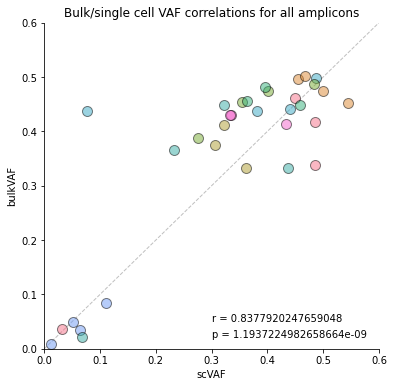

In [293]:
fig, ax = plt.subplots(figsize = (6,6))

print(stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF']))
rs = stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF'])[0]
pv = stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF'])[1]

x_list = []#y_list = []

for i, row in all_VAF.iterrows():
    x = row['s_VAF']
    x_list.append(x)
    y = row['b_VAF']
    y_list.append(y)
    color = allVAFcols[row['amplicon']]
    ax.scatter(x, y, color = color, alpha = 0.5, s = 100, edgecolor = 'black')

#Plot 1:1 correlation line
x = np.array([0, 0.2, 0.4, 0.6])
ax.plot(x, x, ls = '--', c = 'silver', lw = 1, zorder = 0)

ax.set_ylim(0,0.6)
ax.set_xlim(0,0.6)
ax.margins(x=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('bulkVAF')
ax.set_xlabel('scVAF')
ax.text(0.3, 0.05, f'r = {rs}')
ax.text(0.3, 0.02, f'p = {pv}')
ax.set_title('Bulk/single cell VAF correlations for all amplicons')

fig.savefig('../Results/allVAFs_pooled.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/allVAFs_pooled.png',bbox_inches='tight', dpi = 600)

In [294]:
#TODO - put all correlation plots into a single output plot
#TODO - plot line of fit (but not sure exactly how Fbaio suggested to do this)

In [296]:
m, b = np.polyfit(x_list, y_list, 1)
m = int(m)
b = int(b)
print(type(m))
print(m, b)

<class 'int'>
0 0


In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
for i, row in all_VAF.iterrows():
    xr = row['s_VAF']
    yr = row['b_VAF']
    x = 
    color = allVAFcols[row['amplicon']]
    ax.scatter(x, y, color = color, alpha = 0.5, s = 100, edgecolor = 'black')